## Question 5

Import Dataset

In [1]:
import pandas as pd

# Load the data
file_path = 'Registos_Incendios_SGIF_2011_2020.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the dataset
print(df.head())


  Codigo_SGIF  Codigo_ANEPC   Ano  Mes  Dia  Hora  AreaPov_ha  AreaMato_ha  \
0      DM2111           368  2011    1    1    17         0.0        0.010   
1      BL4112          1236  2011    1    9    22         0.0        0.000   
2      DM3111           820  2011    1   15    17         0.0        0.000   
3      BL2111          1977  2011    1   18    22         0.0        0.001   
4      DM2113          7930  2011    1   19    17         0.0        0.005   

   AreaAgric_ha  AreaTotal_ha  ...       ISI         DC       DMC       FFMC  \
0       0.00000       0.01000  ...  0.291930   4.092373  0.653638  54.525424   
1       0.00200       0.00200  ...  0.013831   1.835452  0.367371  32.001278   
2       0.00001       0.00001  ...  1.171990   9.658571  1.573768  74.889775   
3       0.00000       0.00100  ...  0.248910  12.477199  0.762519  51.102608   
4       0.00000       0.00500  ...  0.008092   3.968661  0.508191  32.290416   

        BUI  CodCausa     TipoCausa  \
0  0.934234

How many fire occurrences were registered in protected areas for RNAP and RNMNPF? What are the percentage of those compared to the total of fire incidents?

Year: 2020
Total number of fire incidents: 9619
Number of fire incidents in RNAP: 318
Number of fire incidents in RNMPF: 401


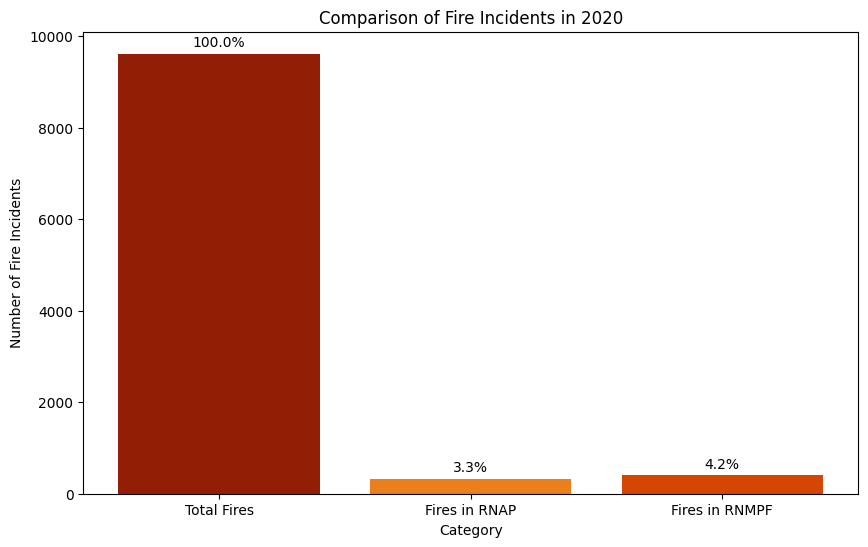

In [2]:
import matplotlib.pyplot as plt

# Define the specific year
specific_year = 2020

# Filter the dataset for the specific year
df_year = df[df['Ano'] == specific_year]

# Calculate total number of fire incidents for the specific year
total_fires_year = len(df_year)

# Calculate the number of fire occurrences in RNAP and RNMPF for the specific year
fires_in_RNAP_year = df_year['RNAP'].notnull().sum()
fires_in_RNMPF_year = df_year['RNMPF'].notnull().sum()

# Output the results
print(f'Year: {specific_year}')
print(f'Total number of fire incidents: {total_fires_year}')
print(f'Number of fire incidents in RNAP: {fires_in_RNAP_year}')
print(f'Number of fire incidents in RNMPF: {fires_in_RNMPF_year}')

# Calculate the percentage of fires in RNAP and RNMPF compared to the total fire incidents for the specific year
percentage_in_RNAP_year = (fires_in_RNAP_year / total_fires_year) * 100
percentage_in_RNMPF_year = (fires_in_RNMPF_year / total_fires_year) * 100

# Create a bar plot for the comparison
labels = ['Total Fires', 'Fires in RNAP', 'Fires in RNMPF']
values = [total_fires_year, fires_in_RNAP_year, fires_in_RNMPF_year]
percentages = [100, percentage_in_RNAP_year, percentage_in_RNMPF_year]
colors = ['#931E06', '#EB7F1B', '#D34703']  # Gradient of orange shades

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors)

# Annotate the bars with the percentage values
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + total_fires_year * 0.01, f'{percentage:.1f}%', ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Number of Fire Incidents')
plt.title(f'Comparison of Fire Incidents in {specific_year}')
plt.show()
